In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from collections import Counter
%matplotlib inline

In [2]:
path = 'dest'

csv_warc_files = os.listdir(path)
len(csv_warc_files)

64

In [3]:
def replace_nan(df, replacement=''):
    for column in df.columns:
        df[column].fillna(replacement, inplace=True)

In [4]:
content_language = []
html_language = []
html_dir = []
domain = []

for csv_file in csv_warc_files:
    df = pd.read_csv(f'{path}/{csv_file}')
    replace_nan(df)
    content_language.extend(df['Content-Language'].to_list())
    html_language.extend(df['HTML-Language'].to_list())
    html_dir.extend(df['HTML-Dir'].to_list())
    domain.extend(df['Domain'].to_list())

In [5]:
Counter(content_language)

Counter({'': 2109791,
         'en': 101512,
         'en-US': 51369,
         'de': 12904,
         'fr': 9743,
         'es': 7219,
         'ru': 4339,
         'it': 3978,
         'ja': 2804,
         'nl': 2767,
         'en-GB': 2111,
         'zh-CN': 1884,
         'en-us': 1544,
         'pl': 1414,
         'cs': 1203,
         'pt-BR': 1154,
         'sv': 977,
         'ar': 968,
         'de-DE': 957,
         'da': 927,
         'el': 778,
         'hu': 777,
         'en-gb': 710,
         'zh-TW': 700,
         'fi': 693,
         'ko': 676,
         'pt': 606,
         'pt-br': 574,
         'ca': 569,
         'vi': 563,
         'nb': 554,
         'tr': 516,
         'uk': 505,
         'fa': 488,
         'fr-FR': 477,
         'pt-PT': 426,
         'ro': 423,
         'es-ES': 400,
         'sk': 391,
         'ja-JP': 337,
         'he': 300,
         'zh': 297,
         'en-CA': 296,
         'it-IT': 277,
         'hi': 243,
         'ro-RO': 216,
         'l

In [138]:
Counter(html_language)

Counter({'en': 199445,
         '': 195722,
         'en-US': 162373,
         'ja': 42176,
         'es': 33669,
         'ru': 30361,
         'de-DE': 24064,
         'de': 22712,
         'fr-FR': 19904,
         'en-GB': 19238,
         'fr': 18806,
         'it-IT': 15476,
         'ru-RU': 14412,
         'nl': 9304,
         'pl-PL': 8660,
         'zh-CN': 8594,
         'nl-NL': 8101,
         'tr': 8020,
         'cs': 7839,
         'vi': 7837,
         'it': 7713,
         'pt-BR': 7531,
         'en-gb': 7162,
         'pl': 6863,
         'ko': 5469,
         'hu': 5354,
         'ar': 4587,
         'es-ES': 4507,
         'fa-IR': 4166,
         'el': 3925,
         'en-us': 3842,
         'en-AU': 3782,
         'id': 3568,
         'sv-SE': 3392,
         'fi': 2979,
         'ro-RO': 2969,
         'uk': 2838,
         'sv': 2750,
         'pt-br': 2676,
         'pt': 2467,
         'ru-ru': 2248,
         'zh': 2219,
         'da-DK': 2194,
         'en-CA': 2102,

In [137]:
Counter(html_dir)

Counter({'': 901743,
         'ltr': 110169,
         'rtl': 11093,
         'LTR': 2677,
         'auto': 288,
         'lt': 89,
         'l': 87,
         'RTL': 51,
         ' ': 14,
         'ltr ': 12,
         'Литра': 9,
         'lfr': 8,
         '/uz/': 8,
         'direction': 7,
         'left': 7,
         'lrt': 7,
         ' lang': 7,
         '0': 6,
         '/en/': 6,
         '/': 4,
         'лкд': 3,
         'https://taiyojisho': 3,
         'nordsachsen/': 3,
         '/ru/': 2,
         ' rtl': 1,
         'hkthgc': 1,
         'bayerisch-schwaben/': 1,
         'DESC': 1,
         'chemnitz/': 1})

In [136]:
Counter(domain)

Counter({'com': 450751,
         'org': 56678,
         'ru': 46168,
         'de': 41153,
         'net': 35105,
         'uk': 22674,
         'it': 20152,
         'jp': 20065,
         'fr': 19135,
         'pl': 17700,
         'nl': 17117,
         'edu': 11776,
         'cz': 10989,
         'br': 10959,
         'es': 10480,
         'au': 10381,
         'ca': 9304,
         'cn': 9089,
         'info': 7008,
         'eu': 6877,
         'se': 6586,
         'hu': 6394,
         'ch': 5995,
         'ro': 5972,
         'be': 5849,
         'gr': 5647,
         'vn': 5466,
         'ua': 5438,
         'in': 5321,
         'dk': 4719,
         'at': 4640,
         'co': 4401,
         'gov': 4078,
         'kr': 3827,
         'sk': 3793,
         'fi': 3672,
         'ar': 3541,
         'ir': 3505,
         'id': 3359,
         'no': 3182,
         'pt': 2979,
         'tw': 2515,
         'cl': 2428,
         'io': 2322,
         'mx': 2200,
         'za': 2158,
         '

In [15]:
def bar_plot(elements: list, max=35, xlabel=None, ylabel=None, title=None, figsize=(10, 6), orientation='h', remove_nan=False):
    _dict = dict(Counter(elements))
    if remove_nan:
        _dict.pop('')
    
    keys = list(_dict.keys())
    values = list(_dict.values())
    
    plt.figure(figsize=figsize)

    if orientation in {'h', 'horizontal'}:
        plt.barh(keys[:max], values[:max])
    elif orientation in {'v', 'vertical'}:
        plt.bar(keys[:max], values[:max])
    else:
        raise f'{orientation} is not a valid orientation.'
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

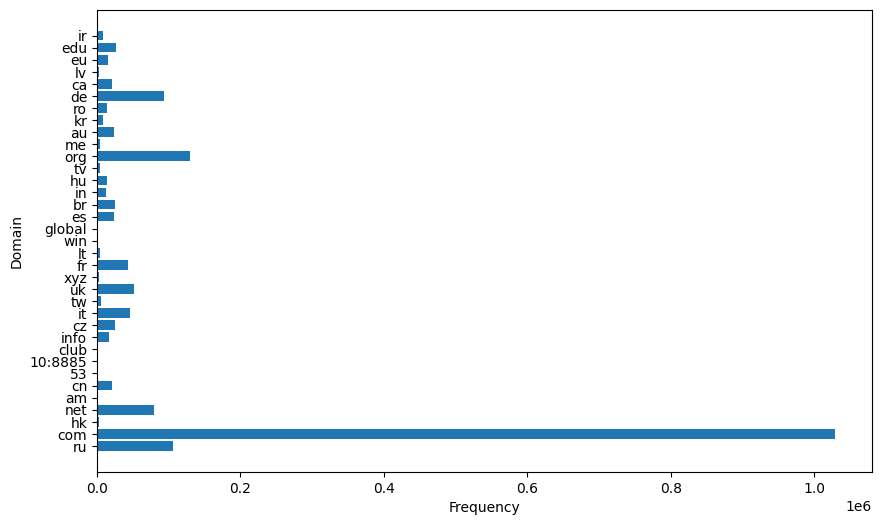

In [16]:
bar_plot(domain, xlabel='Frequency', ylabel='Domain')

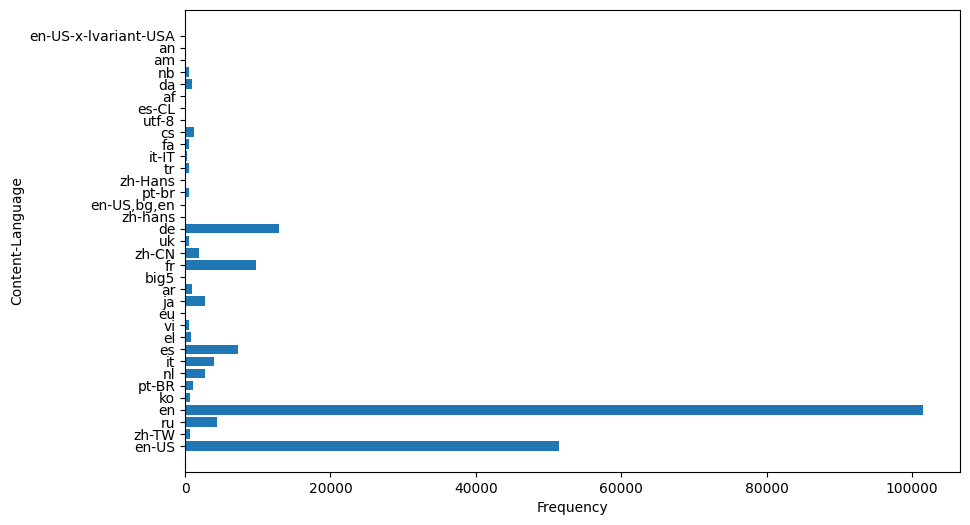

In [17]:
bar_plot(content_language, xlabel='Frequency', ylabel='Content-Language', remove_nan=True)

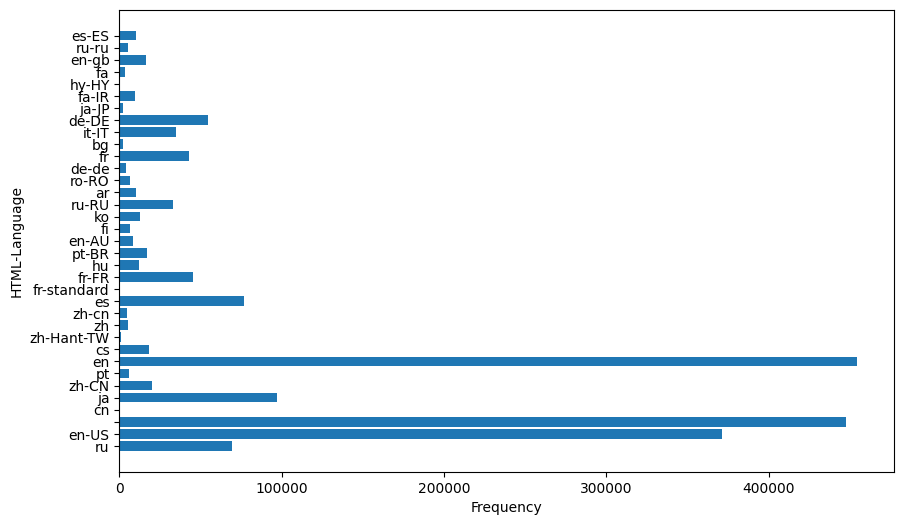

In [151]:
bar_plot(html_language, xlabel='Frequency', ylabel='HTML-Language')

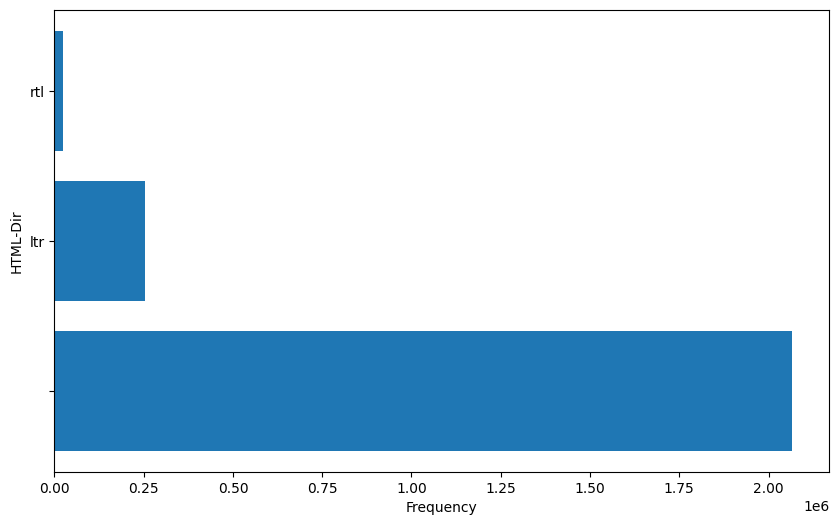

In [152]:
bar_plot(html_dir, xlabel='Frequency', ylabel='HTML-Dir')